In [2]:
import tensorflow as tf
import os

In [3]:
import cv2
import imghdr
from matplotlib import pyplot as plt
import numpy as np

In [3]:
data_dir='pic'

In [4]:
image_exts=['jpeg','jpg','bmp','png']

In [5]:
img=cv2.imread(os.path.join('pic','tm','debris.jpg'))
plt.imshow(resize.numpy().astype(int))
plt.show()

NameError: name 'resize' is not defined

In [6]:
for img_cls in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,img_cls)):
        img_path=os.path.join(data_dir,img_cls,image)
        try:
            img=cv2.imread(img_path)
            tip=imghdr.what(img_path)
            if tip not in image_exts:
                print('image not here')
                os.remove(img_path)
        except Exception as e:
            print('issue with {}'.format(img_path))

In [7]:
data=tf.keras.utils.image_dataset_from_directory('pic')

Found 1900 files belonging to 2 classes.


In [8]:
data_iterator=data.as_numpy_iterator()
batch=data_iterator.next()

In [9]:
batch[0].shape

(32, 256, 256, 3)

In [10]:
batch[1]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

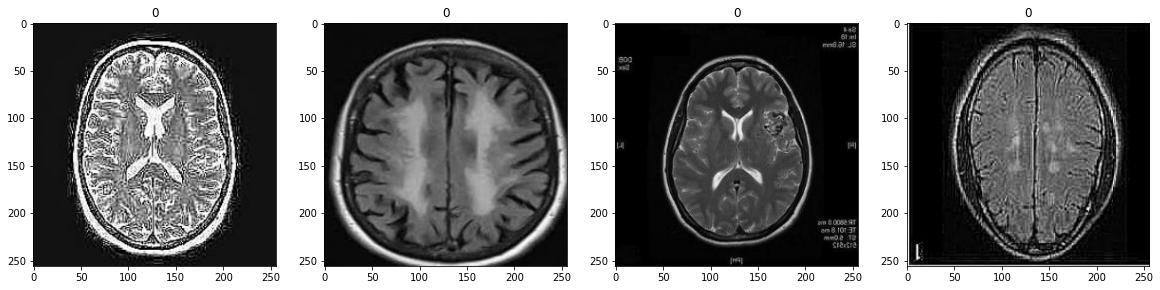

In [11]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [12]:
data=data.map(lambda x,y:(x/255,y))#normalisation
data.as_numpy_iterator().next()

(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.18474264, 0.18474264, 0.18474264],
          [0.07399

In [13]:
len(data)

60

In [14]:
train_size=int(len(data)*.5)
val_size=int(len(data)*.2)+1
test_size=int(len(data)*.1)+1

In [15]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [17]:
model=Sequential()#try functional

#layer 1 - input layer.....16 fliters(3x3 pixels , stride of 1)
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D()) #max value after relu activation
 
#layer 2 - 32 fliters(3x3 pixels , stride of 1)
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D()) #max value after relu activation

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid')) #gives the final output

In [18]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [19]:
logdir='div'
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [22]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20


30/30 [==============================] - 18s 581ms/step - loss: 0.0125 - accuracy: 0.9969 - val_loss: 0.2377 - val_accuracy: 0.9543
Epoch 2/20
30/30 [==============================] - 18s 589ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.2154 - val_accuracy: 0.9663
Epoch 3/20
30/30 [==============================] - 18s 581ms/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.1570 - val_accuracy: 0.9688
Epoch 4/20
30/30 [==============================] - 18s 588ms/step - loss: 0.0069 - accuracy: 0.9979 - val_loss: 0.2394 - val_accuracy: 0.9639
Epoch 5/20
30/30 [==============================] - 18s 588ms/step - loss: 0.0225 - accuracy: 0.9927 - val_loss: 0.1935 - val_accuracy: 0.9663
Epoch 6/20
30/30 [==============================] - 18s 590ms/step - loss: 0.0093 - accuracy: 0.9979 - val_loss: 0.4359 - val_accuracy: 0.9519
Epoch 7/20
30/30 [==============================] - 18s 578ms/step - loss: 0.0257 - accuracy: 0.9906 - val_loss: 0.2268 - val_accuracy: 0.9591
Epoch 8/20

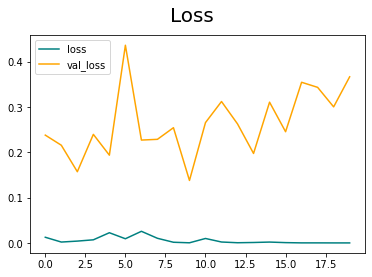

In [23]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

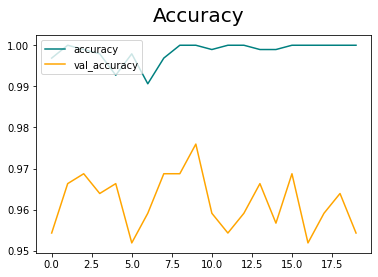

In [24]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [25]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy#confusion metrics

In [26]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [27]:
for batch in test.as_numpy_iterator():
    X,y=batch
    yhat=model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 112ms/step


In [28]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:0.8999999761581421,Recall:0.8372092843055725,Accuracy:0.9508928656578064


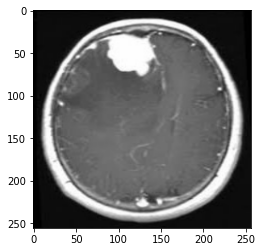

1/1 [==============================] - 0s 29ms/step
[[0.9995428]]
Tumor present


In [31]:
img=cv2.imread('Te-me_0038.jpg')
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat=model.predict(np.expand_dims(resize/255,0))
print(yhat)
if yhat>0.5:
    print('Tumor present')
else:
    print('Tumor not present')

In [ ]:
#saving and inference.....yolo
#confusion metrics

In [5]:
import pickle
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(model)

NameError: name 'model' is not defined

In [33]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy#confusion metrics

In [34]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [6]:
from joblib import Parallel, delayed
import joblib

In [7]:
joblib.dump(model, 'tumor_detection.pkl')

NameError: name 'model' is not defined

In [8]:
knn_from_joblib = joblib.load('tumor_detection.pkl')

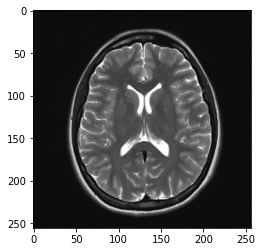

1/1 [==============================] - 0s 401ms/step
[[1.7666774e-09]]
No tumor :)


In [9]:
img=cv2.imread('normalbrain.png')
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()
yhat=knn_from_joblib.predict(np.expand_dims(resize/255,0))
print(yhat)
if yhat>0.5:
    print('Tumor Present')
else:
    print('No tumor :)')